In [1]:
from  sklearn.datasets  import load_iris

In [2]:
iris = load_iris()

In [3]:
import matplotlib.pyplot as plt
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

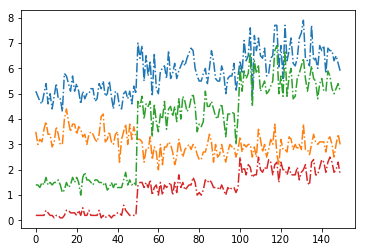

In [4]:
plt.figure()
plt.plot(iris.data,'-.')
plt.show()

In [5]:
iris.target[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
from sklearn.preprocessing import StandardScaler
stan_data = StandardScaler().fit_transform(iris.data)
stan_data[0:10]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

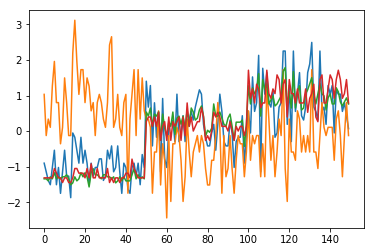

In [7]:
plt.figure()
plt.plot(stan_data)
plt.show()

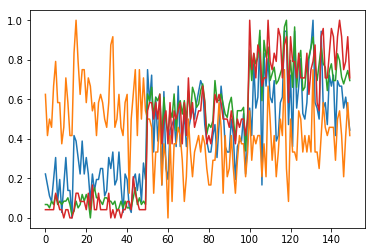

In [8]:
from sklearn.preprocessing import MinMaxScaler
maxmin_data = MinMaxScaler().fit_transform(iris.data)
plt.figure()
plt.plot(maxmin_data)
plt.show()

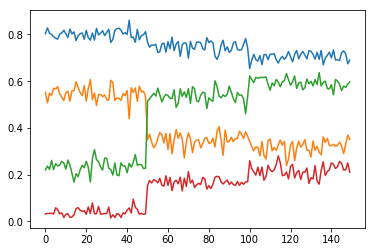

In [9]:
from sklearn.preprocessing import Normalizer
nor_data = Normalizer().fit_transform(iris.data)
plt.figure()
plt.plot(nor_data)
plt.show()

7.9 0.1


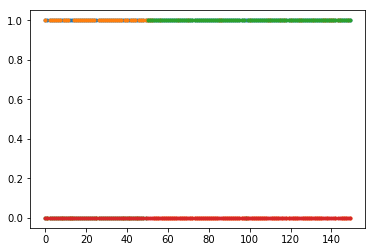

In [10]:
from sklearn.preprocessing import Binarizer
print(iris.data.max(),iris.data.min())
bin_data = Binarizer(threshold=3).fit_transform(iris.data)
plt.figure()
plt.plot(bin_data,'.')
plt.show()

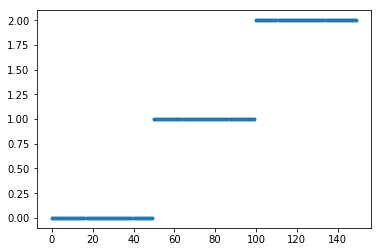

In [11]:
plt.plot(iris.target,'.')
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
ply_data  = PolynomialFeatures().fit_transform(iris.data)
print(ply_data.shape,iris.data.shape)

(150, 15) (150, 4)


In [13]:
from sklearn.feature_selection import VarianceThreshold
var_data = VarianceThreshold(threshold=3).fit_transform(iris.data)
print(var_data.shape,iris.data.shape)

(150, 1) (150, 4)


D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
select_data = SelectFromModel(LogisticRegression(penalty='l1',C=0.1)).fit_transform(iris.data,iris.target)
print(select_data.shape,iris.data.shape)

(150, 3) (150, 4)


D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [15]:
select_data[0:10]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5]])

In [16]:
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [17]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(iris.data)
print(pca_data.shape,iris.data.shape)

(150, 2) (150, 4)


In [26]:
from sklearn.feature_selection import SelectKBest
import numpy as np
from scipy.stats import pearsonr

#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
sel_data = SelectKBest(lambda X, Y: tuple(map(tuple,np.array(list(map(lambda x:pearsonr(x, Y), X.T))).T)), k=2).fit_transform(iris.data, iris.target)
print(sel_data.shape,iris.data.shape)

(150, 2) (150, 4)


D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
lda_data = LDA.fit_transform(iris.data, iris.target)
print(lda_data.shape,iris.data.shape)

(150, 2) (150, 4)


In [ ]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import FeatureUnion

#新建将整体特征矩阵进行对数函数转换的对象
step2_1 = ('ToLog', FunctionTransformer(log1p))
#新建将整体特征矩阵进行二值化类的对象
step2_2 = ('ToBinary', Binarizer())
#新建整体并行处理对象
#该对象也有fit和transform方法，fit和transform方法均是并行地调用需要并行处理的对象的fit和transform方法
#参数transformer_list为需要并行处理的对象列表，该列表为二元组列表，第一元为对象的名称，第二元为对象
union_sele = FeatureUnion(transformer_list=[step2_1, step2_2])

In [ ]:
union_data = union_sele.fit_transform(iris.data)
print(union_data.shape, iris.data.shape)